<h1>Project Introduction</h1>

Since the start of the new decade we have seen an influx of new technologies being adapted into social culture. One of these technologies that has been very debated and talked about have been NFT's, digital non-fungible tokens that can be bought using cryptocurrencies such as Ethereum. While many people either love them or hate them, NFTs have still continued to grow. Using the NFT Collections dataset found from Kaggle, I aim to show how well NFT Collections are doing in terms of sales, buyers, transactions, and owners. The data originates from [cryptoslam.io](cryptoslam.io), a website that keeps statistics on NFT Collections and blockchains.

Exploring correlation between NFT Sales & # of All-Time Buyers, Transactions, and Owners.  

Dataset: NFT Collections

Source: Kaggle https://www.kaggle.com/hemil26/nft-collections-dataset

This datset contains 5 columns: Collection (Name), Sales (All-Time), # of Buyers (All-Time), # of Transactions (All-Time), # of Owners (All-Time) 

In [1]:
import numpy as np
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

<h1>Data Observations Using Pandas & Numpy</h1>

From looking at our created DataFrame, we can make several observations. In terms of size, we have 250 rows of different NFT collections present in our data. The data is already sorted by Sales in descending order. We can also see from querying for null values that the there are NaN values in the 'Owners' column for quite a few collections. My next step is to format and arrange my data in a way to prepare for proper analysis between columns.

In [2]:
df = pd.read_csv(r'nft_sales_v0602.csv')
df

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,945,119,477","1,556,752","13,723,004","2,952,428"
1,CryptoPunks,"$2,001,750,639","5,154","20,087","3,470"
2,Bored Ape Yacht Club,"$1,306,466,924","9,402","24,469","6,314"
3,Art Blocks,"$1,183,404,370","26,109","140,456","30,192"
4,NBA Top Shot,"$899,041,520","407,970","15,778,187","649,140"
...,...,...,...,...,...
245,Star Sailor Siblings,"$9,683,878","3,732","10,179","2,795"
246,DuskBreakers,"$9,668,012","4,022","11,218",NaN
247,Quantum Traders,"$9,621,922","3,733","7,674","3,717"
248,KingFrogs,"$9,244,655","5,858","11,798","5,603"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       174 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [4]:
print(df.Sales)

0      $3,945,119,477
1      $2,001,750,639
2      $1,306,466,924
3      $1,183,404,370
4        $899,041,520
            ...      
245        $9,683,878
246        $9,668,012
247        $9,621,922
248        $9,244,655
249        $9,106,328
Name: Sales, Length: 250, dtype: object


As we can see, the shape of our data consists of 5 columns and 250 rows/entries. The dtype of all the columns are registered as objects due to the contents containing strings and the numerical data has commans which makes pandas consider them as mixed type. It can also be seen that the Owners column has a different amount of non-null values than the others. We will address this issues later but for now let's see what other information we can observe from our data.

<h1>DataFrame Formatting</h1>

Before I start analyzing my dataframe for correlation, I first want to make sure it is in a suitable format in case there are any issues such as missing data to make it easier to interact with the data. My first decision was to change the index of the data to the name of the corresponding NFT Collections, so it will be clearer which specific collections are being referenced. This now leaves us with 4 columns: Sales, Buyers, Transactions, and Owners.

In [5]:
df = df.set_index('Collections')
df

,Sales,Buyers,Txns,Owners
Collections,,,,
Axie Infinity,"$3,945,119,477","1,556,752","13,723,004","2,952,428"
CryptoPunks,"$2,001,750,639","5,154","20,087","3,470"
Bored Ape Yacht Club,"$1,306,466,924","9,402","24,469","6,314"
Art Blocks,"$1,183,404,370","26,109","140,456","30,192"
NBA Top Shot,"$899,041,520","407,970","15,778,187","649,140"
...,...,...,...,...
Star Sailor Siblings,"$9,683,878","3,732","10,179","2,795"
DuskBreakers,"$9,668,012","4,022","11,218",NaN
Quantum Traders,"$9,621,922","3,733","7,674","3,717"


My next change to the data is to change the dtype of my columns to integers as they should be. To do this, I remove all the commas and dollar signs from the columns as needed and then assign the columns data type as integer.

In [6]:
 # removing commas from numerical values
df['Sales'] = df['Sales'].str.replace(',', '')
df['Sales'] = df['Sales'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',', '')
df['Txns'] = df['Txns'].str.replace(',', '')
df['Owners'] = df['Owners'].str.replace(',', '')

In [7]:
df['Sales'] = df['Sales'].astype(int)
df['Buyers'] = df['Buyers'].astype(int)
df['Txns'] = df['Txns'].astype(int)
df['Owners'] = df['Owners'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Axie Infinity to Royal Society Players
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   250 non-null    int64  
 1   Buyers  250 non-null    int64  
 2   Txns    250 non-null    int64  
 3   Owners  174 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 9.8+ KB


My next step is address the missing/NaN values within my data. We can see below from the heatmap that the only column with NaN values is the Owners column. To alleviate this issue I decided to drop the rows with missing values since the information about how many NFT owners there are for some collections are not publicly available. I also chose to do this rather than to fill the values to 0 because I would not want this to effect my future correlations with the data. This dropped our dataframe size to 174 rows. 

<AxesSubplot:ylabel='Collections'>

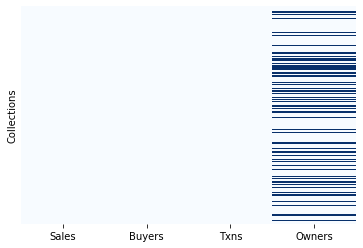

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [10]:
df = df.dropna()
df

,Sales,Buyers,Txns,Owners
Collections,,,,
Axie Infinity,3945119477,1556752,13723004,2952428.0
CryptoPunks,2001750639,5154,20087,3470.0
Bored Ape Yacht Club,1306466924,9402,24469,6314.0
Art Blocks,1183404370,26109,140456,30192.0
NBA Top Shot,899041520,407970,15778187,649140.0
...,...,...,...,...
Sollamas,9718145,4785,10647,3637.0
Star Sailor Siblings,9683878,3732,10179,2795.0
Quantum Traders,9621922,3733,7674,3717.0


<h1>Column Observations</h1>

**Sales**

One of the best ways to analyze the success of an NFT Collection would be to look at amount of money acquired through sales. 

In [11]:
df[['Sales']].sort_values('Sales',ascending=True)

,Sales
Collections,
Royal Society Players,9106328
KingFrogs,9244655
Quantum Traders,9621922
Star Sailor Siblings,9683878
Sollamas,9718145
...,...
NBA Top Shot,899041520
Art Blocks,1183404370
Bored Ape Yacht Club,1306466924


We can see that the NFT Collection in our data that has aquired the most profit is Axie Infinity with a staggering 3,945,119,477 in profit. That's a lot of money! The collection that has the minimum amount of sales is Royal Society Players with $9,106,328 in profit.

In [12]:
df[['Sales']].describe()

,Sales
count,1.740000e+02
mean,1.059979e+08
std,3.660360e+08
min,9.106328e+06
25%,1.452217e+07
50%,2.635729e+07
75%,6.728251e+07
max,3.945119e+09


The average amount of Sales in our data is $105,997,891 and the standard deviation of sales is 3,660,360,004. 

**Transactions**

Another good way to look at the success and popularity of an NFT Collection is the amount of transactions that have happened all time. This column represents the total number of buying and selling transactions within a respective collection.

In [13]:
df[['Txns']].sort_values('Txns', ascending=True)

,Txns
Collections,
Deafbeef,142
Autoglyphs,353
Mutant Garden Seeder,504
Avid Lines,508
Basis Markets,773
...,...
Sorare,1244247
Farmers World,2168991
Alien Worlds,5120264


In [14]:
df[['Txns']].describe()

,Txns
count,1.740000e+02
mean,2.533399e+05
std,1.632668e+06
min,1.420000e+02
25%,8.714750e+03
50%,1.313950e+04
75%,1.879700e+04
max,1.577819e+07


From this column, we can see that the collection with the least amount of transactions in our data is Deadbeef with 142 and the collection with the most is NBA Top Shot with 15,778,187. The average number of transactions for a collection within our data is 253,339 and the standard deviation is 1,632,667.

**Owners**

The number of owners in a collection tells us how many unique people currently own an NFT from the collection. 

In [15]:
df[['Owners']].sort_values('Owners', ascending=True)

,Owners
Collections,
RTFKT CloneX Mintvial,1.0
Curio Cards,1.0
MetaHero Universe DAO Tokens,1.0
adidas Originals,1.0
888 Inner Circle,1.0
...,...
CryptoKitties,113324.0
Ethereum Name Service,274410.0
NBA Top Shot,649140.0


In [16]:
df[['Owners']].describe()

,Owners
count,1.740000e+02
mean,4.617396e+04
std,3.225507e+05
min,1.000000e+00
25%,2.914000e+03
50%,4.084000e+03
75%,5.338000e+03
max,3.019167e+06


Unlike other columns, we can see that quite a few collections have the same value of 1 owner. We can also see that the highest number of owners for a collection is 3,019,167. The average number of owners for our data is 46,173.

**Buyers**

Buyers tell us how many people have actually bought from a collection.

In [17]:
df[['Buyers']].sort_values('Buyers', ascending=True)

,Buyers
Collections,
Deafbeef,98
Autoglyphs,187
Mutant Garden Seeder,270
Avid Lines,284
Basis Markets,355
...,...
Sorare,63274
CryptoKitties,114421
NBA Top Shot,407970


In [18]:
df[['Buyers']].describe()

,Buyers
count,1.740000e+02
mean,2.137355e+04
std,1.258618e+05
min,9.800000e+01
25%,3.794750e+03
50%,5.763500e+03
75%,7.665250e+03
max,1.556752e+06


Here we see our lowest value is Deadbeef with 98 total buyers and Axie Infinity with the highest value of 1,556,752 buyers. The average number of buyers in our data is 21,373.

<h1>Visualizations & Correlations</h1>

Now we will start to make more advanced observsations about the data overall through visualization and correlation of columns. I chose to use scatterplots to visualize our data because we have 174 unique indexes and our numerical data is all-time as opposed to time-series. Using the corr() method we see from the computation that Buyers and Transactions, Buyers and Owners have the strongest correlations.

In [19]:
df.corr(method='pearson')

,Sales,Buyers,Txns,Owners
Sales,1.000000,0.788959,0.628875,0.570156
Buyers,0.788959,1.000000,0.829943,0.863808
Txns,0.628875,0.829943,1.000000,0.710099
Owners,0.570156,0.863808,0.710099,1.000000


<AxesSubplot:title={'center':'Buyers vs Owners'}, xlabel='Buyers', ylabel='Owners'>

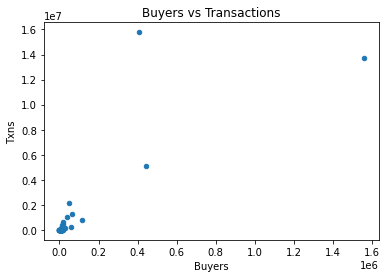

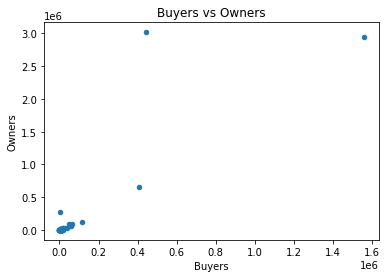

In [20]:
df.plot.scatter(x='Buyers',y='Txns', title='Buyers vs Transactions')
df.plot.scatter(x='Buyers',y='Owners', title='Buyers vs Owners')

From plotting these columns however, there's not much to see. Most of the collections in our dataset have both a low number of buyers and owners as well as transactions with only few being away from the cluster or one complete outlier

<AxesSubplot:title={'center':'Sales vs Buyers'}, xlabel='Buyers', ylabel='Sales'>

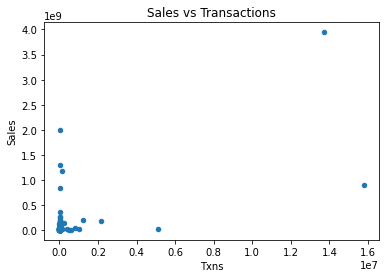

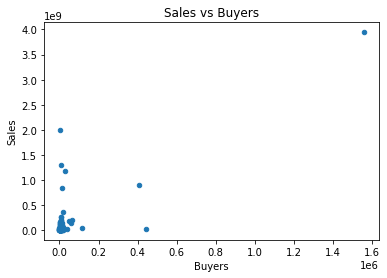

In [21]:
df.plot.scatter(x='Txns',y='Sales', title='Sales vs Transactions')
df.plot.scatter(x='Buyers', y='Sales', title='Sales vs Buyers')

Plotting collection sales against both transactions and buyers also shows us that for most of our data there is not much of a correlation. This tells us that while these collections can make a lot of money, it doesn't mean that many people are buying them. This alludes to the price tag some NFT Collections can have.

<h1>Closing Remarks</h1>

As we've seen from our exploration into this NFT Collections Dataset, NFT's are vastly growing and a lot of money has been made in sales. Throughout our plots and looking at the min and max's of columns we saw that [Axie Infinity](https://axieinfinity.com/) was quite prevalent as an outlier. To answer what makes Axie Infinity so popular, it is actually a game using NFT's as characters with unique skills and abilities. Players are constantly trading or buying to upgrade to a better character. From knowing this, it's easy to see how it has dominated in all the columns. Looking back, I wish I could have used time-series data as that could have opened up to a lot more see over time such as growth of these collections.